## Tensorflow MNIST DataSet
https://www.tensorflow.org/datasets/catalog/mnist

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(type(x_train), x_train.dtype)
x_train.shape

<class 'numpy.ndarray'> uint8


(60000, 28, 28)

In [4]:
print(type(y_train), y_train.dtype)
y_train.shape

<class 'numpy.ndarray'> uint8


(60000,)

In [5]:
print(type(x_test), x_test.dtype)
x_test.shape

<class 'numpy.ndarray'> uint8


(10000, 28, 28)

In [6]:
print(type(y_test), y_test.dtype)
y_test.shape

<class 'numpy.ndarray'> uint8


(10000,)

In [20]:
np.set_printoptions(edgeitems=20, linewidth=600)

In [22]:
print(x_train[23])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 121 254 136   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 230 253 248  99   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 118 253 253 225  42   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61 253 253 25

Text(0.5, 1.0, 'The label is 1')

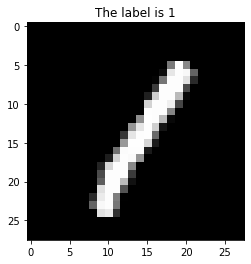

In [9]:
#plt.imshow(x_train[0], cmap="inferno")
index = 23
plt.imshow(x_train[index], cmap="gray")
plt.title(f"The label is {y_train[index]}")

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

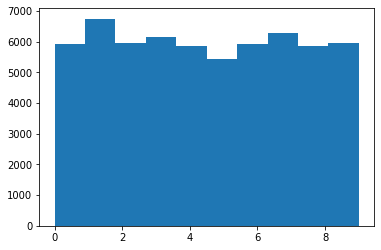

In [10]:
plt.hist(y_train)

Normalization, type-casting, ...

from tensorflow.keras.utils import to_categorical

index = 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(y_train[index])

# Onehot-Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[index])

## Build the model

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

print('\nEvaluation (Untrained / Lazy-Estimator / Baseline):')
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________

Evaluation (Untrained / Lazy-Estimator / Baseline):
313/313 [==============================] - 1s 873us/step - loss: 2.3598 - accuracy: 0.0932


[2.3597731590270996, 0.09319999814033508]

### First Test
just for fun

(10,)


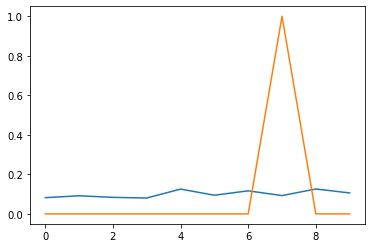

In [96]:
sample = x_test[0].reshape((1, 28, 28)) # Attention: Every layer expects a 3d-Tensor!!
prediction = model.predict(sample)[0]
print(prediction.shape)

plt.plot(prediction)
plt.plot(y_test[0])
plt.show()

## Train the Model

In [97]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2
)

model.evaluate(x_test, y_test)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.9081 - val_loss: 0.1569 - val_accuracy: 0.9528
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1358 - accuracy: 0.9586 - val_loss: 0.1436 - val_accuracy: 0.9578
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0998 - accuracy: 0.9694 - val_loss: 0.1254 - val_accuracy: 0.9627
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0776 - accuracy: 0.9755 - val_loss: 0.1046 - val_accuracy: 0.9694
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.1122 - val_accuracy: 0.9695
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.1154 - val_accuracy: 0.9677
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.1055 - val_accuracy:

[0.10597562044858932, 0.972100019454956]

### Another Test
Just for fun

(10,)


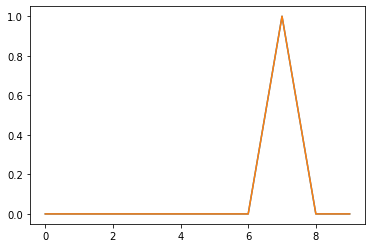

In [78]:
sample = x_test[0].reshape((1, 28, 28))
prediction = model.predict(sample)[0]
print(prediction.shape)

plt.plot(prediction)
plt.plot(y_test[0])
plt.show()

## Analyze the History

In [79]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [75]:
history.history

{'loss': [0.33513355255126953,
  0.16501487791538239,
  0.11958540976047516,
  0.09407246112823486,
  0.07558730244636536],
 'accuracy': [0.90625,
  0.9503124952316284,
  0.9647499918937683,
  0.9721666574478149,
  0.9771666526794434],
 'val_loss': [0.19031813740730286,
  0.1548016518354416,
  0.1318492591381073,
  0.11546622961759567,
  0.11376412957906723],
 'val_accuracy': [0.9460833072662354,
  0.956250011920929,
  0.9629166722297668,
  0.9648333191871643,
  0.965749979019165]}

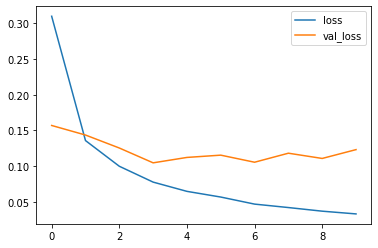

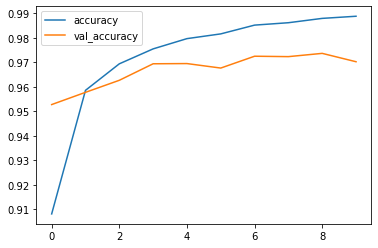

In [98]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()


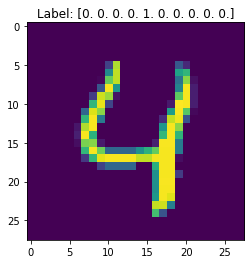

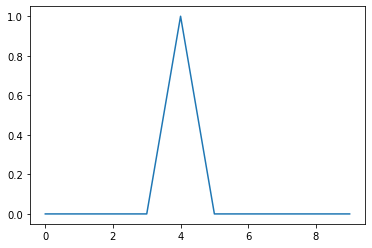

In [99]:
index = 4

plt.imshow(x_test[index])
plt.title(f"Label: {y_test[index]}")
plt.show()
plt.close()
plt.plot(model.predict(x_test[index].reshape((1,28,28)))[0])